In [1]:
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 600
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *
import sys

sys.path.append('/home/kjetil/projects/alsvinn_pure/build/python/')
import alsvinn
import os


import matplotlib2tikz
sys.path.append('../python')
import plot_info
from plot_info import showAndSave

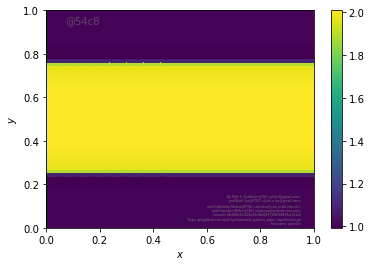

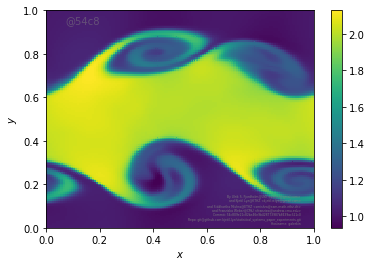

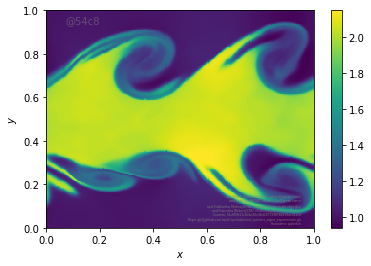

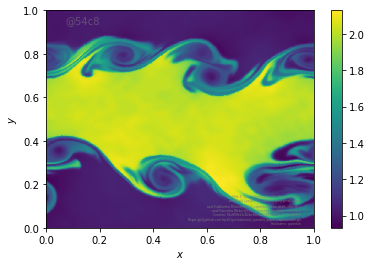

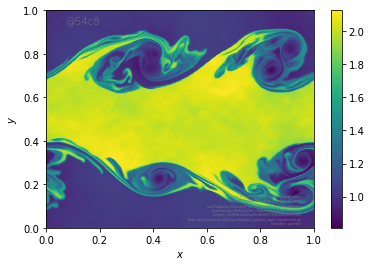

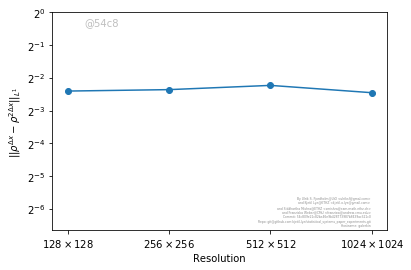

In [2]:
resolutions = [64,128,256,512,1024]
samples = 1
errors = [[] for k in range(samples)]
dataPrev = [None for k in range(samples)]
for resolution in resolutions:
    runner = alsvinn.run(name='kh', base_xml='kelvinhelmholtz/kelvinhelmholtz.xml', 
                         dimension=[resolution, resolution, 1], T=2, 
                         uq=True, number_of_saves=1, statistics=['meanvar'], samples=samples)    
    
    for sample in range(samples):
        data = runner.get_data('rho', 1, sample=sample).T
        
        x,y = mgrid[0:1:resolution*1j, 0:1:resolution*1j]
        plt.pcolormesh(x, y, data)
        plt.colorbar()
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        showAndSave('kh_single_%d_%d' % (resolution, sample))
        
        if resolution > resolutions[0]:
            errors[sample].append(sum(abs(data-dataPrev[sample]))/resolution**2)
        dataPrev[sample] = repeat(repeat(data, 2, 0), 2, 1)
for sample in range(samples):
    plt.loglog(resolutions[1:], errors[sample], '-o', basex=2, basey=2)
    plt.xlabel('Resolution')
    plt.ylim([1e-2,1])
    plt.xticks(resolutions[1:], ['${r} \\times {r}$'.format(r=r) for r in resolutions[1:]])
    plt.ylabel('$||\\rho^{\Delta x}-\\rho^{2\Delta x}||_{L^1}$')
    showAndSave('kh_single_l1_convergence_%d' % sample)

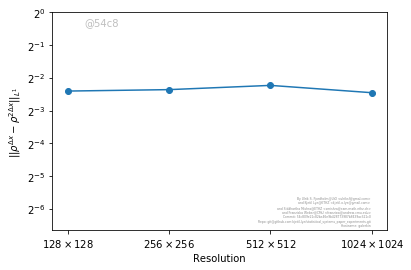

In [3]:
for sample in range(samples):
    plt.loglog(resolutions[1:], errors[sample], '-o', basex=2, basey=2)
    plt.xlabel('Resolution')
    plt.ylabel('$||\\rho^{\Delta x}-\\rho^{2\Delta x}||_{L^1}$')
    plt.ylim([1e-2,1])
    plt.xticks(resolutions[1:], ['${r} \\times {r}$'.format(r=r) for r in resolutions[1:]])
    showAndSave('kh_single_l1_convergence_%d' % sample)

In [4]:
print(errors)

[[0.1888409486459229, 0.1946620499587633, 0.21294875075405068, 0.18234622513659396]]
